Installing and Updating Essential Libraries

In [49]:
pip install --upgrade beautifulsoup4

In [54]:
pip install geopandas folium plotly

Importing Essential Libraries

In [2]:
import pandas as pd
import bs4 
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Store the URL in a variable

In [3]:
url = 'https://www.census2011.co.in/states.php'

Acess the containts of the webpage

In [4]:
HEADER = ({'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2454.85 Safari/537.36', 'Accept-Language': 'en-US, en;q=0.5'})

Request the webpage

In [5]:
page = requests.get(url)

print(page)

<Response [200]>


Parse the HTML content using BeautifulSoup

In [6]:
soup = bs4.BeautifulSoup(page.text, 'html.parser')

Find the 'table' in the HTML code of the web page

In [7]:
table = soup.find('table')

In [8]:
table

<table class="table table-striped table-hover">
<thead>
<tr>
<th class="srno">#</th>
<th class="alignleft">State</th>
<th>Population</th>
<th>Increase</th>
<th>Area(Km<sup>2</sup>)</th>
<th>Density</th>
<th>Sex-Ratio</th>
<th>Literacy</th>
</tr>
</thead>
<tbody class="searchable">
<tr class="firstrow">
<td>-</td>
<td class="alignleft">India</td>
<td>1,210,854,977</td>
<td>17.64 %</td>
<td>3,287,240</td>
<td>382</td>
<td>940</td>
<td>74.04</td>
</tr>
<tr>
<td>1</td>
<td class="alignleft"><a href="/census/state/uttar+pradesh.html">Uttar Pradesh</a></td>
<td>199,812,341</td>
<td>20.23 %</td>
<td>240,928</td>
<td>829</td>
<td>912</td>
<td>67.68</td>
</tr>
<tr>
<td>2</td>
<td class="alignleft"><a href="/census/state/maharashtra.html">Maharashtra</a></td>
<td>112,374,333</td>
<td>15.99 %</td>
<td>307,713</td>
<td>365</td>
<td>929</td>
<td>82.34</td>
</tr>
<tr>
<td>3</td>
<td class="alignleft"><a href="/census/state/bihar.html">Bihar</a></td>
<td>104,099,452</td>
<td>25.42 %</td>
<td>94,163</

Get the column headers for the table, which have 'th' tag

In [9]:
titles = soup.find_all('th')

In [10]:
titles

[<th class="srno">#</th>,
 <th class="alignleft">State</th>,
 <th>Population</th>,
 <th>Increase</th>,
 <th>Area(Km<sup>2</sup>)</th>,
 <th>Density</th>,
 <th>Sex-Ratio</th>,
 <th>Literacy</th>]

Get only text by stripping off extra spaces

In [11]:
tables_titles = [title.text.strip() for title in titles]# Get the column headers

In [12]:
tables_titles

['#',
 'State',
 'Population',
 'Increase',
 'Area(Km2)',
 'Density',
 'Sex-Ratio',
 'Literacy']

Making an empty DataFrame with the extracted column names and store it in the df variable

In [13]:
df = pd.DataFrame(columns = tables_titles )
df

,#,State,Population,Increase,Area(Km2),Density,Sex-Ratio,Literacy


Extract the data rows which have the 'tr' code and run a for loop to populate the rows with data points which have 'td' tags, completeing our table

In [14]:
col_data = table.find_all('tr')
for row in col_data[1:]:
    row_data = row.find_all('td')
    ind_row = [data.text.strip() for data in row_data]
    lenght = len(df)
    df.loc[lenght] = ind_row

Getting the basic summary of the elements in the data set

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           36 non-null     object
 1   State       36 non-null     object
 2   Population  36 non-null     object
 3   Increase    36 non-null     object
 4   Area(Km2)   36 non-null     object
 5   Density     36 non-null     object
 6   Sex-Ratio   36 non-null     object
 7   Literacy    36 non-null     object
dtypes: object(8)
memory usage: 2.5+ KB


Data Cleaning and converting the necessary variables from object to float to do any further analysis

In [16]:
df = df.replace(',', '', regex=True)
df = df.replace('%', '', regex=True)

In [17]:
df['Population'] = df['Population'].astype(float)
df['Increase'] = df['Increase'].astype(float)
df['Area(Km2)'] = df['Area(Km2)'].astype(float)
df['Density'] = df['Density'].astype(float)
df['Literacy'] = df['Literacy'].astype(float)
df['Sex-Ratio'] = df['Sex-Ratio'].astype(float)

Save the dataframe to local storage in .csv format

In [18]:
df.to_csv('C:\\Users\\sharv\\Downloads\\Population_ScrappedGrowth17.csv', index = False)

In [19]:
df.describe()

,Population,Increase,Area(Km2),Density,Sex-Ratio,Literacy
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000
mean,6.726972e+07,19.253056,1.826308e+05,1076.333333,931.277778,77.746389
std,2.008793e+08,10.968504,5.419553e+05,2358.491394,78.602294,8.493907
min,6.447300e+04,-0.580000,3.000000e+01,17.000000,618.000000,61.800000
25%,1.439840e+06,13.877500,9.926750e+03,174.750000,907.750000,71.712500
50%,2.106970e+07,18.225000,5.457800e+04,357.500000,943.000000,76.600000
75%,6.295858e+07,22.827500,1.647280e+05,732.250000,973.750000,85.900000
max,1.210855e+09,55.880000,3.287240e+06,11320.000000,1084.000000,94.000000


Understanding basic distribution and attributes of the data along with basic Exploratory data analysis

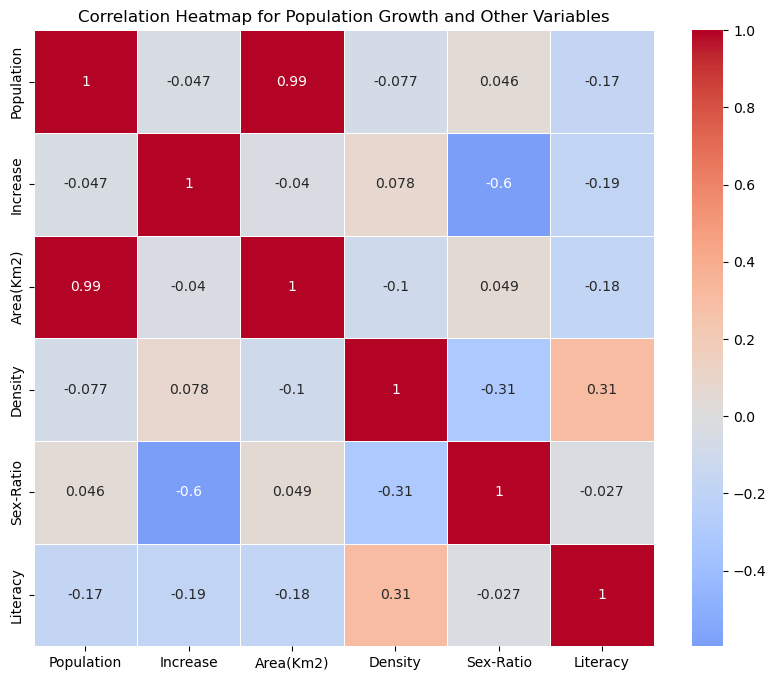

In [20]:
sns.heatmap# Compute the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Focus on correlations with population growth
plt.title('Correlation Heatmap for Population Growth and Other Variables')
plt.show()

Correlation Coefficent between two variables

In [21]:
correlation = df[['Increase', 'Literacy']].corr().iloc[0, 1]

print(f"Correlation coefficient between Increase and Literacy: {correlation:.2f}")

Correlation coefficient between Increase and Literacy: -0.19


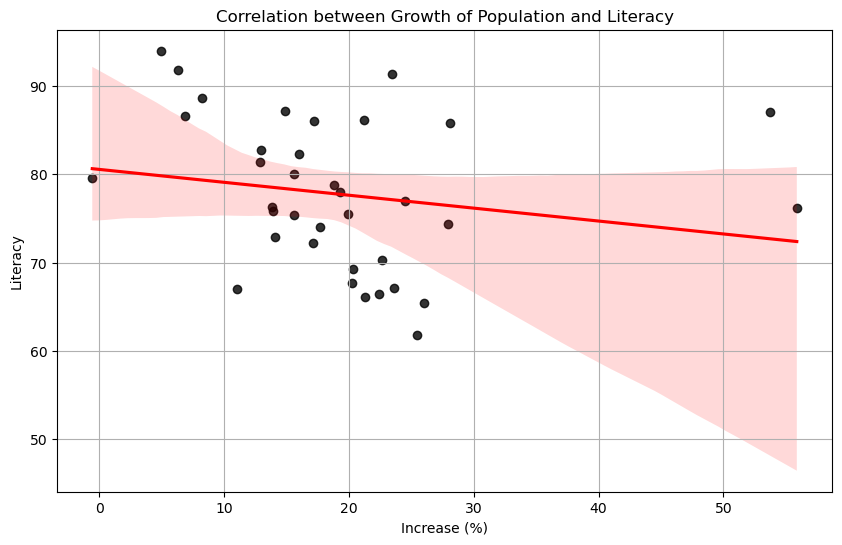

In [22]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Increase', y='Literacy', data=df, scatter_kws={'color':'Black'}, line_kws={'color':'red'})
plt.title('Correlation between Growth of Population and Literacy')
plt.xlabel('Increase (%)')
plt.ylabel('Literacy')
plt.grid(True)
plt.show()

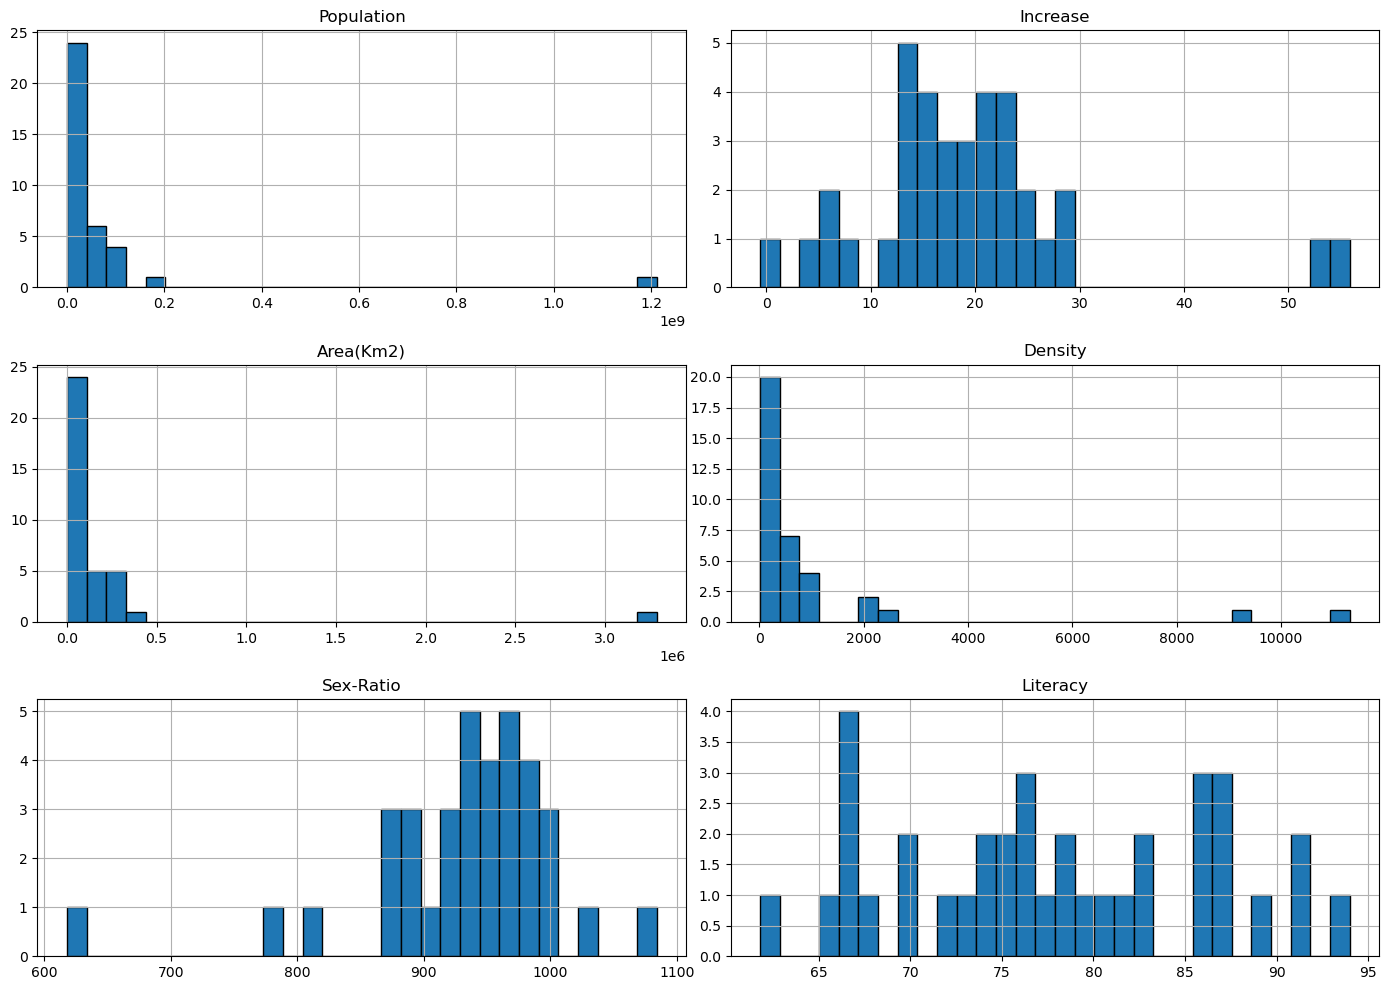

In [23]:
# Plot histograms for numerical columns
df.hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

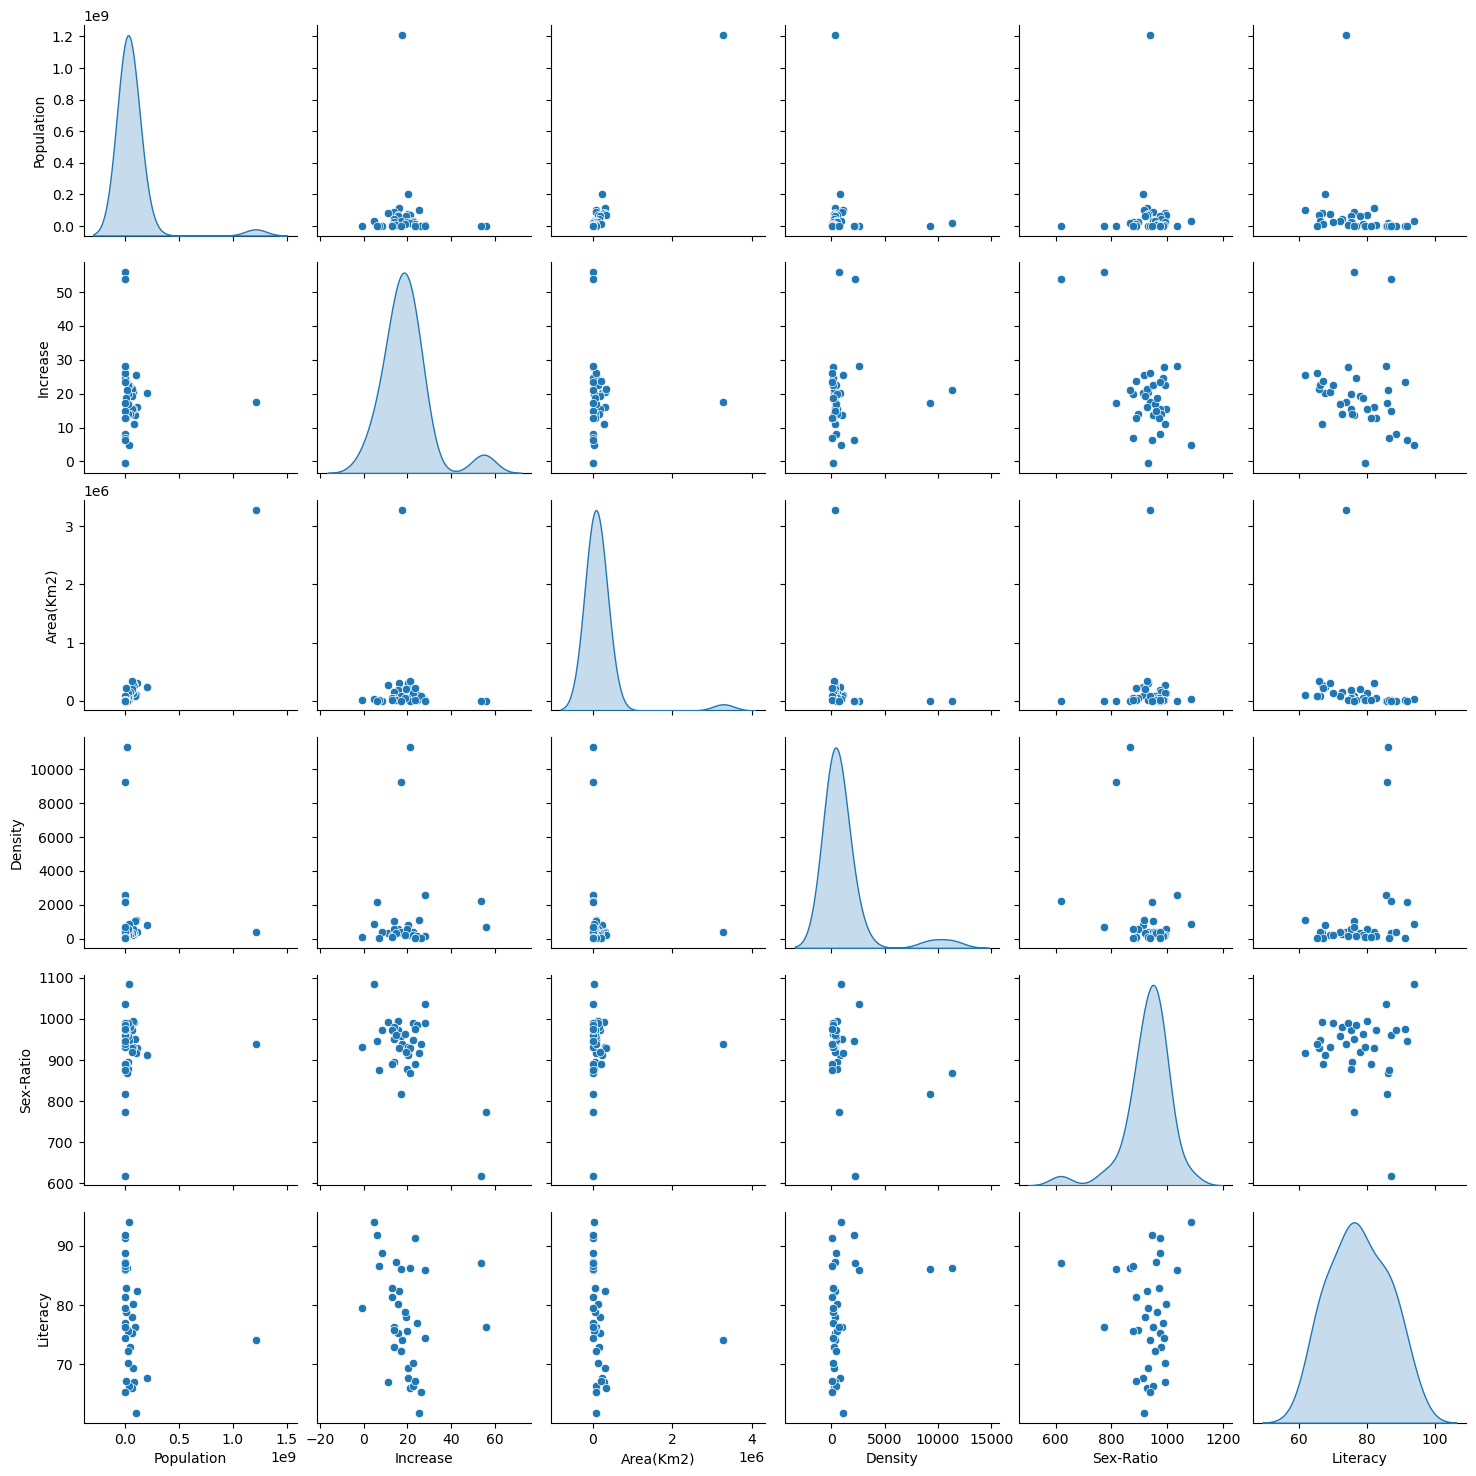

In [24]:
# Pair plot for numerical features
sns.pairplot(df, diag_kind='kde')
plt.show()

Creating visualisation to understand the elements of the data and its prevelance

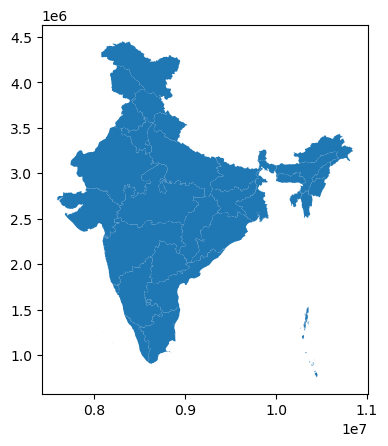

In [25]:
# Load shapefile for India's states (adjust the file path as necessary)
india_map = gpd.read_file(r"C:\Users\sharv\Downloads\External Place\India-State-and-Country-Shapefile-Updated-Jan-2020-master\India_State_Boundary.shp")

# Preview the map data
india_map.plot()
plt.show()

In [26]:
# Merge the map data (shapefile) with the DataFrame 'df' based on state names from both datasets
merged = india_map.merge(df, how='left', left_on='State_Name', right_on='State')

# Check the merged data
print(merged.head())

                                 State_Name  \
0                         Andaman & Nicobar   
1                                Chandigarh   
2  Daman and Diu and Dadra and Nagar Haveli   
3                                     Delhi   
4                                   Haryana   

                                            geometry    #       State  \
0  MULTIPOLYGON (((10341718.474 1449533.161, 1034...  NaN         NaN   
1  POLYGON ((8546255.616 3606050.813, 8546315.400...   30  Chandigarh   
2  MULTIPOLYGON (((8122247.822 2312434.407, 81223...  NaN         NaN   
3  POLYGON ((8583390.570 3359116.190, 8583476.212...   18       Delhi   
4  POLYGON ((8524318.539 3516490.865, 8524451.392...   17     Haryana   

   Population  Increase  Area(Km2)  Density  Sex-Ratio  Literacy  
0         NaN       NaN        NaN      NaN        NaN       NaN  
1   1055450.0     17.19      114.0   9258.0      818.0     86.05  
2         NaN       NaN        NaN      NaN        NaN       NaN  
3  1678794

In [27]:
# Filter the DataFrame 'df' to keep only the rows where the 'State' column matches any 'State_Name' in the 'india_map' GeoDataFrame
df = df[df['State'].isin(india_map['State_Name'])]

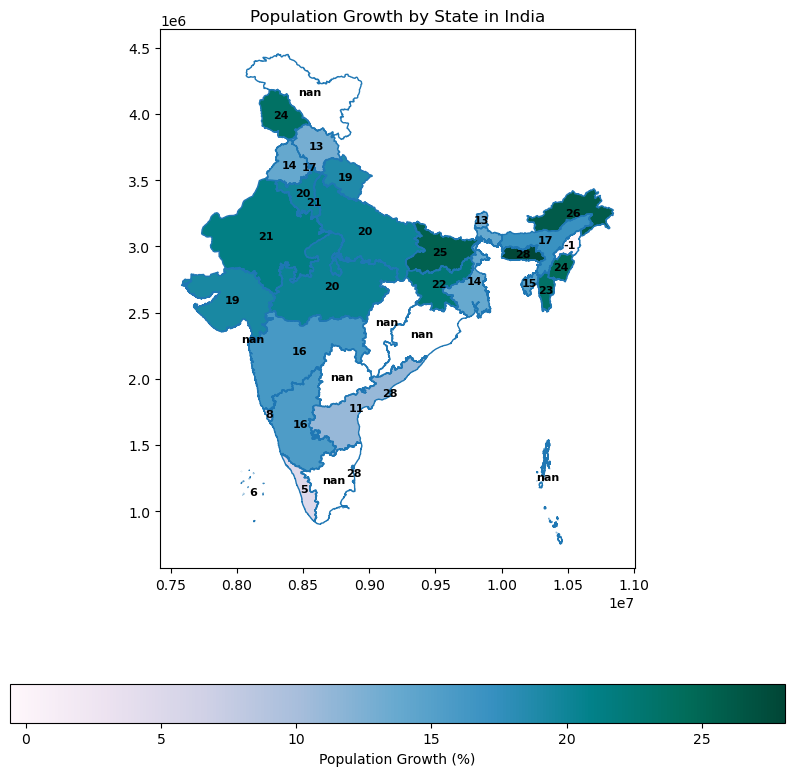

In [28]:
# Plotting the population growth heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Plot state boundaries
merged.boundary.plot(ax=ax, linewidth=1)

# Plot the heatmap with a reversed color map (lighter for low values, darker for high values)
merged.plot(column='Increase', cmap='PuBuGn', ax=ax, legend=True,
            legend_kwds={'label': "Population Growth (%)",
                         'orientation': "horizontal"})

# Adding data labels for literacy rate
for idx, row in merged.iterrows():
    plt.text(row['geometry'].centroid.x, row['geometry'].centroid.y, 
             f"{row['Increase']:.0f}", fontsize=8, color='Black',
             ha='center', va='center', weight='bold')
    
#Gviing the title and showing the ouput
plt.title('Population Growth by State in India')
plt.show()

Comparison of Population Growth between two regions

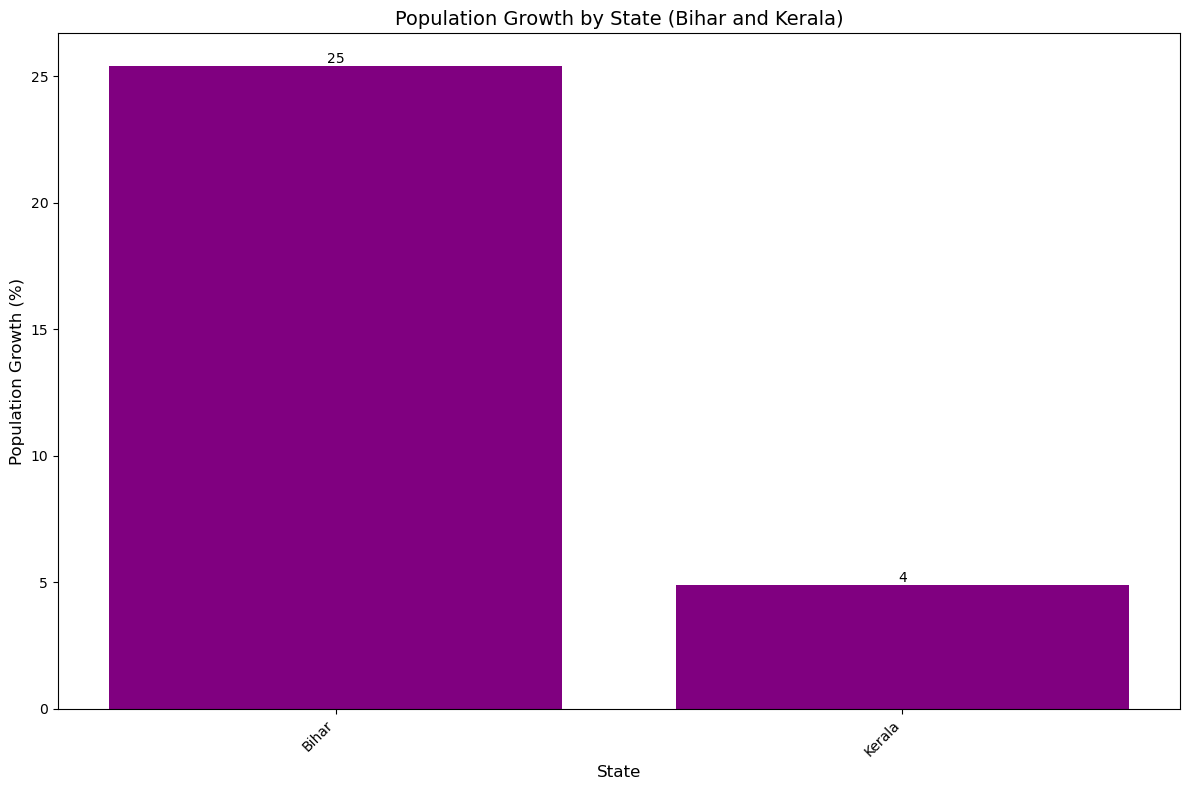

In [29]:
# Filter the DataFrame to include only 'North' and 'South'
df_filtered = df[df['State'].isin(['Bihar', 'Kerala'])]

# Sort the DataFrame by Population Growth for better visualization
df_sorted = df_filtered.sort_values(by='Increase', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Bar plot for Population Growth
bars = ax.bar(df_sorted['State'], df_sorted['Increase'], color='Purple')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', va='bottom', ha='center')

# Set title and labels
plt.title('Population Growth by State (Bihar and Kerala)', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Population Growth (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate region names if needed

# Show the plot
plt.tight_layout()
plt.show()

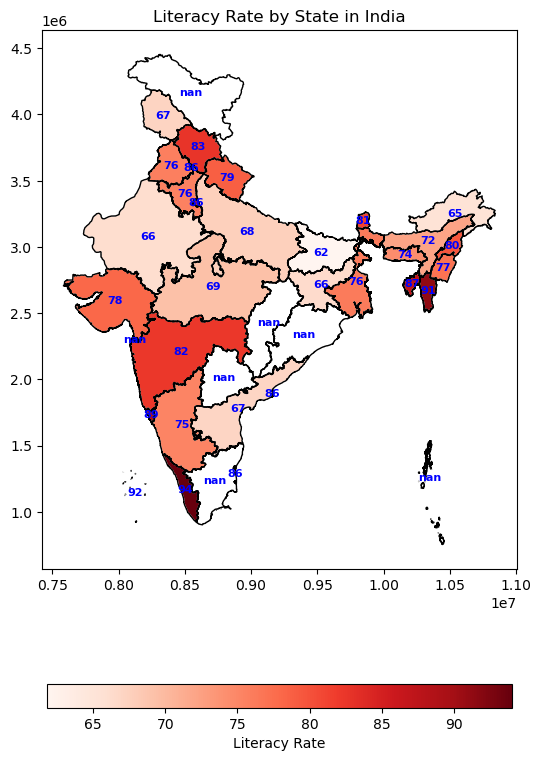

In [30]:
# Plotting the population growth heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Set background color to white
ax.set_facecolor('white')

# Plot state boundaries
merged.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

# Plot the heatmap with a reversed color map (lighter for low values, darker for high values)
merged.plot(column='Literacy', cmap='Reds', ax=ax, legend=True,
            legend_kwds={'label': "Literacy Rate",
                         'orientation': "horizontal",
                         'shrink': 0.6},  # Shrinking the legend to fit better
            edgecolor='white')  # Boundary color inside the map

# Adding data labels for literacy rate
for idx, row in merged.iterrows():
    plt.text(row['geometry'].centroid.x, row['geometry'].centroid.y, 
             f"{row['Literacy']:.0f}", fontsize=8, color='Blue',
             ha='center', va='center', weight='bold')

# Set title with black text
plt.title('Literacy Rate by State in India', color='black')

# Show the plot
plt.show()

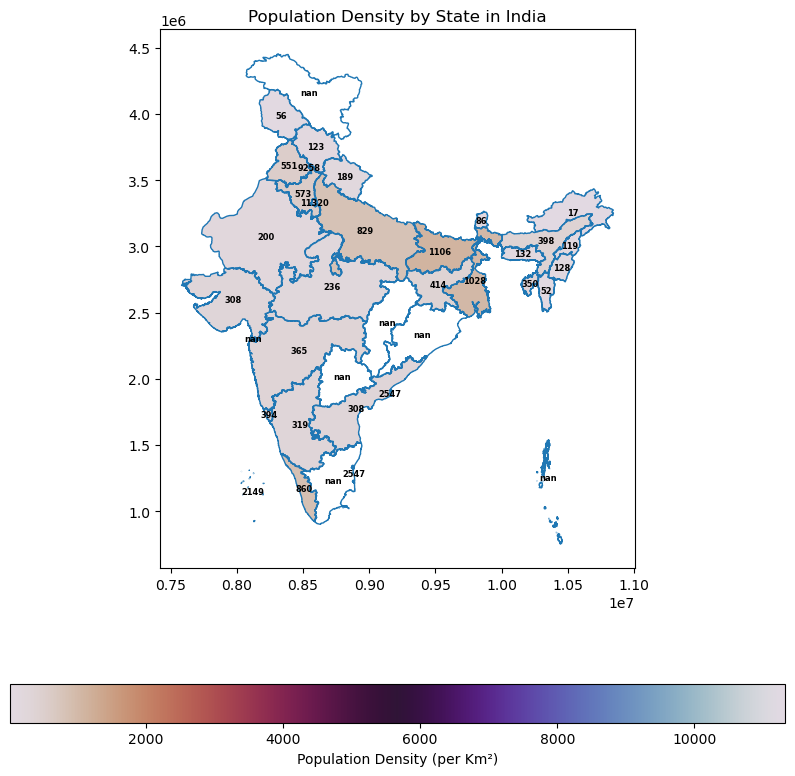

In [31]:
# Plotting the population growth heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot state boundaries
merged.boundary.plot(ax=ax, linewidth=1)


# Plot the heatmap with a reversed color map (lighter for low values, darker for high values)
merged.plot(column='Density', cmap='twilight_r', ax=ax, legend=True,
            legend_kwds={'label': "Population Density (per Km²)",
                         'orientation': "horizontal"})
# Adding data labels for Density 
for idx, row in merged.iterrows():
    plt.text(row['geometry'].centroid.x, row['geometry'].centroid.y, 
             f"{row['Density']:.0f}", fontsize=6, color='Black',
             ha='center', va='center', weight='bold')

#Showing the output
plt.title('Population Density by State in India')
plt.show()

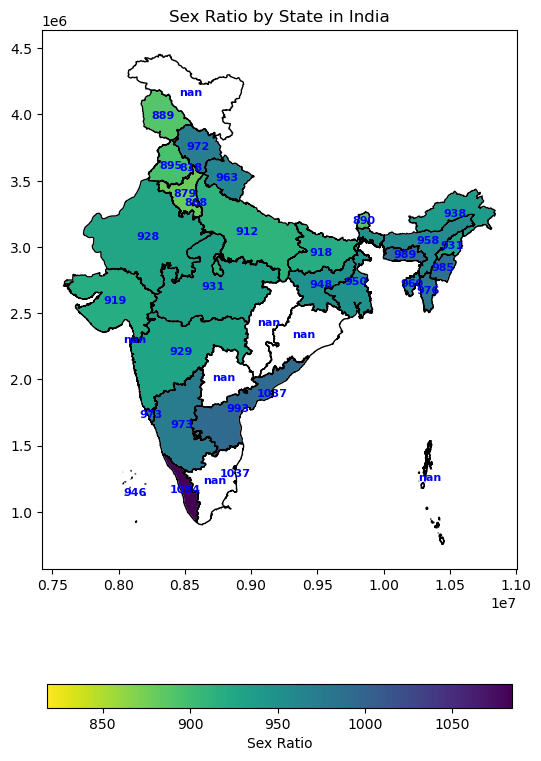

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Set background color to white
ax.set_facecolor('white')

# Plot state boundaries
merged.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

# Plot the heatmap for Sex-Ratio with a color map (lighter for low values, darker for high values)
merged.plot(column='Sex-Ratio', cmap='viridis_r', ax=ax, legend=True,
            legend_kwds={'label': "Sex Ratio",
                         'orientation': "horizontal",
                         'shrink': 0.6},  # Shrinking the legend to fit better
            edgecolor='white')  # Boundary color inside the map

# Adding data labels for Sex Ratio
for idx, row in merged.iterrows():
    plt.text(row['geometry'].centroid.x, row['geometry'].centroid.y, 
             f"{row['Sex-Ratio']:.0f}", fontsize=8, color='Blue',
             ha='center', va='center', weight='bold')

# Set title with black text
plt.title('Sex Ratio by State in India', color='black')

# Show the plot
plt.show()

Saving the analysis and changes done to a new csv inroder to retain the orginal scrapped file

In [33]:
df.to_csv('C:\\Users\\sharv\\Downloads\\Population_ScrappedGrowth18.csv', index = False)

Importing the newly saved csv as input for further analysis

In [34]:
df = pd.read_csv('C:\\Users\\sharv\\Downloads\\Population_ScrappedGrowth18.csv')

In [35]:
df.head()

,#,State,Population,Increase,Area(Km2),Density,Sex-Ratio,Literacy
0,1,Uttar Pradesh,199812341.0,20.23,240928.0,829.0,912.0,67.68
1,2,Maharashtra,112374333.0,15.99,307713.0,365.0,929.0,82.34
2,3,Bihar,104099452.0,25.42,94163.0,1106.0,918.0,61.80
3,4,West Bengal,91276115.0,13.84,88752.0,1028.0,950.0,76.26
4,5,Andhra Pradesh,84580777.0,10.98,275045.0,308.0,993.0,67.02


Classifying states to their respective regions to do a regionwise analysis and visualization 

In [36]:
# Dictionary to map states to their specific regions
region_mapping = {
    "Uttar Pradesh": "North", "Bihar": "North", "Madhya Pradesh": "North", "Rajasthan": "North", 
    "Punjab": "North", "Haryana": "North", "Delhi": "North", "Uttarakhand": "North", 
    "Himachal Pradesh": "North", "Jammu and Kashmir": "North", "Chandigarh": "North",
    
    "Andhra Pradesh": "South", "Tamil Nadu": "South", "Karnataka": "South", 
    "Kerala": "South", "Puducherry": "South", "Lakshadweep": "South", "Andaman and Nicobar Islands": "South",
    
    "West Bengal": "East", "Orissa": "East", "Jharkhand": "East", "Assam": "East", 
    "Tripura": "East", "Meghalaya": "East", "Manipur": "East", "Nagaland": "East", 
    "Arunachal Pradesh": "East", "Sikkim": "East", "Chhattisgarh": "East", "Mizoram": "East",
    
    "Gujarat": "West", "Maharashtra": "West", "Goa": "West", "Dadra and Nagar Haveli": "West", "Daman and Diu": "West"
}

# Create a new column "Region" based on the mapping
df['Region'] = df['State'].map(region_mapping)

In [37]:
df['Region'].value_counts()

North    11
East     10
South     5
West      3
Name: Region, dtype: int64

The code calculates and converts percentage values into decimals to derive actual population figures based on the given percentages.

In [38]:
# Calculate the increase percentage as a decimal and store it in a new column 'Increase_percent'
df['Increase_percent'] = df['Increase']/100

# Calculate the change in population based on the increase percentage and store it in a new column 'Change in Population'
df['Change in Population'] = df['Population']* df['Increase_percent']

# Convert literacy percentage to a decimal and store it in a new column 'Literacy_Percent'
df['Literacy_Percent'] = df['Literacy']/100

# Calculate the literate population based on the total population and literacy percentage, and store it in a new column 'Literate Population'
df['Literate Population'] = (df['Population']/100) * df['Literacy_Percent']

In [39]:
df.head()

,#,State,Population,Increase,Area(Km2),Density,Sex-Ratio,Literacy,Region,Increase_percent,Change in Population,Literacy_Percent,Literate Population
0,1,Uttar Pradesh,199812341.0,20.23,240928.0,829.0,912.0,67.68,North,0.2023,4.042204e+07,0.6768,1.352330e+06
1,2,Maharashtra,112374333.0,15.99,307713.0,365.0,929.0,82.34,West,0.1599,1.796866e+07,0.8234,9.252903e+05
2,3,Bihar,104099452.0,25.42,94163.0,1106.0,918.0,61.80,North,0.2542,2.646208e+07,0.6180,6.433346e+05
3,4,West Bengal,91276115.0,13.84,88752.0,1028.0,950.0,76.26,East,0.1384,1.263261e+07,0.7626,6.960717e+05
4,5,Andhra Pradesh,84580777.0,10.98,275045.0,308.0,993.0,67.02,South,0.1098,9.286969e+06,0.6702,5.668604e+05


This code Calculates the total area of Each region (North, South, East, West)

In [40]:
# Calculate the Total Regional Area
region_area_sum = df.groupby('Region')['Area(Km2)'].sum().reset_index()
region_area_sum.rename(columns={'Area(Km2)': 'Total Regional Area'}, inplace=True)

# Merge the total regional area back to the original DataFrame
df = df.merge(region_area_sum, on='Region', how='left')

The code Calculates the Sex ratio for each region ( contains a error rectified further down)

In [41]:
df['Number of Girls'] = (df['Sex-Ratio'] / (1000 + df['Sex-Ratio'])) * df['Population']

In [56]:
# Sum the total number of girls for each region
region_girls_sum = df.groupby('Region')['Number of Girls'].sum().reset_index()
region_girls_sum.rename(columns={'Number of Girls': 'Total Regional Girls'}, inplace=True)

(Error Recitified further down)

In [57]:
# Merge the regional girls sum with the original DataFrame to get the regional totals
df = pd.merge(df, region_girls_sum, on='Region')

# Calculate the regional sex ratio
region_totals = df.groupby('Region').agg({
    'Population': 'sum',
    'Total Regional Girls': 'sum'
}).reset_index()
region_totals['Regional Sex Ratio'] = (region_totals['Total Regional Girls'] / (region_totals['Population'] - region_totals['Total Regional Girls'])) * 1000

# Merge the regional sex ratio back into the original DataFrame
df = pd.merge(df, region_totals[['Region', 'Regional Sex Ratio']], on='Region', how='left')

The code Sums all the Population, The change in Population and the Literate Population for each state and groups it by their region

In [68]:
# Group the DataFrame by 'Region' and sum the 'Population' for each region, resetting the index to create a new DataFrame
region_population_sum = df.groupby('Region')['Population'].sum().reset_index()

# Rename the 'Population' column to 'Total Regional Population' in the newly created DataFrame for clarity
region_population_sum.rename(columns={'Population': 'Total Regional Population'}, inplace=True)

#Similar code as above but with respect to Change in Population
region_change_population_sum = df.groupby('Region')['Change in Population'].sum().reset_index()
region_change_population_sum.rename(columns={'Change in Population': 'Total Regional Change in Population'}, inplace=True)

#Similar code as above but with respect to Literate Population
region_literate_population_sum = df.groupby('Region')['Literate Population'].sum().reset_index()
region_literate_population_sum.rename(columns={'Literate Population': 'Total Regional Literate Population'}, inplace=True)


# Merge the aggregated data back to the original DataFrame
df = df.merge(region_population_sum, on='Region', how='left')
df = df.merge(region_change_population_sum, on='Region', how='left')
df = df.merge(region_literate_population_sum, on='Region', how='left')

In [59]:
df.head()

,#,State,Population,Increase,Area(Km2),Density,Sex-Ratio,Literacy,Region,Increase_percent,...,Total Regional Literate Population_x,Regional Density,Regional PopGrowth Percent,Regional Literacy Level,Total Regional Girls_y,Total Regional Girls,Regional Sex Ratio,Total Regional Population_y,Total Regional Change in Population_y,Total Regional Literate Population_y
0,1,Uttar Pradesh,199812341.0,20.23,240928.0,829.0,912.0,67.68,North,0.2023,...,3.728600e+06,386.030751,21.018992,0.683498,2.606146e+08,2.606146e+08,-1235.010898,545517426.0,1.146623e+08,3.728600e+06
1,3,Bihar,104099452.0,25.42,94163.0,1106.0,918.0,61.80,North,0.2542,...,3.728600e+06,386.030751,21.018992,0.683498,2.606146e+08,2.606146e+08,-1235.010898,545517426.0,1.146623e+08,3.728600e+06
2,6,Madhya Pradesh,72626809.0,20.35,308252.0,236.0,931.0,69.32,North,0.2035,...,3.728600e+06,386.030751,21.018992,0.683498,2.606146e+08,2.606146e+08,-1235.010898,545517426.0,1.146623e+08,3.728600e+06
3,8,Rajasthan,68548437.0,21.31,342239.0,200.0,928.0,66.11,North,0.2131,...,3.728600e+06,386.030751,21.018992,0.683498,2.606146e+08,2.606146e+08,-1235.010898,545517426.0,1.146623e+08,3.728600e+06
4,15,Punjab,27743338.0,13.89,50362.0,551.0,895.0,75.84,North,0.1389,...,3.728600e+06,386.030751,21.018992,0.683498,2.606146e+08,2.606146e+08,-1235.010898,545517426.0,1.146623e+08,3.728600e+06


The below code Creates New Variables that show the Density of Population in each reagion, the Growth Percent of Population in each region and the Litercy proportion in Each Region

In [69]:
df['Regional Density'] = df['Total Regional Population'] / df['Total Regional Area']
df['Regional PopGrowth Percent' ] = (df['Total Regional Change in Population'] / df['Total Regional Population'])*100
df['Regional Literacy Level' ] = (df['Total Regional Literate Population'] / df['Total Regional Population'])*100

In [71]:
df.head()

,#,State,Population,Increase,Area(Km2),Density,Sex-Ratio,Literacy,Region,Increase_percent,...,Regional PopGrowth Percent,Regional Literacy Level,Total Regional Girls_y,Total Regional Girls,Total Regional Population_y,Total Regional Change in Population_y,Total Regional Literate Population_y,Total Regional Population,Total Regional Change in Population,Total Regional Literate Population
0,1,Uttar Pradesh,199812341.0,20.23,240928.0,829.0,912.0,67.68,North,0.2023,...,21.018992,0.683498,2.606146e+08,2.606146e+08,545517426.0,1.146623e+08,3.728600e+06,545517426.0,1.146623e+08,3.728600e+06
1,3,Bihar,104099452.0,25.42,94163.0,1106.0,918.0,61.80,North,0.2542,...,21.018992,0.683498,2.606146e+08,2.606146e+08,545517426.0,1.146623e+08,3.728600e+06,545517426.0,1.146623e+08,3.728600e+06
2,6,Madhya Pradesh,72626809.0,20.35,308252.0,236.0,931.0,69.32,North,0.2035,...,21.018992,0.683498,2.606146e+08,2.606146e+08,545517426.0,1.146623e+08,3.728600e+06,545517426.0,1.146623e+08,3.728600e+06
3,8,Rajasthan,68548437.0,21.31,342239.0,200.0,928.0,66.11,North,0.2131,...,21.018992,0.683498,2.606146e+08,2.606146e+08,545517426.0,1.146623e+08,3.728600e+06,545517426.0,1.146623e+08,3.728600e+06
4,15,Punjab,27743338.0,13.89,50362.0,551.0,895.0,75.84,North,0.1389,...,21.018992,0.683498,2.606146e+08,2.606146e+08,545517426.0,1.146623e+08,3.728600e+06,545517426.0,1.146623e+08,3.728600e+06


In [63]:
df.describe()

,#,Population,Increase,Area(Km2),Density,Sex-Ratio,Literacy,Increase_percent,Change in Population,Literacy_Percent,...,Total Regional Change in Population_x,Total Regional Literate Population_x,Regional Density,Regional PopGrowth Percent,Regional Literacy Level,Total Regional Girls_y,Total Regional Girls,Total Regional Population_y,Total Regional Change in Population_y,Total Regional Literate Population_y
count,29.000000,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,2.900000e+01,29.000000,...,2.900000e+01,2.900000e+01,29.000000,29.000000,29.000000,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,17.137931,3.690417e+07,17.472414,98539.965517,1186.724138,943.172414,77.642069,0.174724,6.666579e+06,0.776421,...,5.985232e+07,2.226554e+06,379.531572,17.428873,0.726994,1.516906e+08,1.516906e+08,3.146844e+08,5.985232e+07,2.226554e+06
std,9.815164,4.704079e+07,7.017245,109175.848454,2602.857933,52.131064,8.978897,0.070172,9.308685e+06,0.089789,...,4.369489e+07,1.196000e+06,18.354249,3.400266,0.040081,8.669575e+07,8.669575e+07,1.836795e+08,4.369489e+07,1.196000e+06
min,1.000000,6.447300e+04,-0.580000,30.000000,17.000000,818.000000,61.800000,-0.005800,-1.147531e+04,0.618000,...,2.081256e+07,1.256296e+06,343.286675,11.537244,0.683498,8.293463e+07,8.293463e+07,1.700364e+08,2.081256e+07,1.256296e+06
25%,9.000000,1.978502e+06,13.840000,16579.000000,132.000000,918.000000,69.320000,0.138400,3.601841e+05,0.693200,...,2.811451e+07,1.256296e+06,356.364500,16.534401,0.683498,8.293463e+07,8.293463e+07,1.700364e+08,2.811451e+07,1.256296e+06
50%,18.000000,1.678794e+07,18.810000,53483.000000,350.000000,946.000000,76.940000,0.188100,2.964764e+06,0.769400,...,2.811451e+07,1.352597e+06,386.030751,16.534401,0.738839,9.031440e+07,9.031440e+07,1.803946e+08,2.811451e+07,1.352597e+06
75%,25.000000,6.109530e+07,22.420000,191791.000000,829.000000,973.000000,85.850000,0.224200,9.530866e+06,0.858500,...,1.146623e+08,3.728600e+06,394.839479,21.018992,0.749799,2.606146e+08,2.606146e+08,5.455174e+08,1.146623e+08,3.728600e+06
max,35.000000,1.998123e+08,28.080000,342239.000000,11320.000000,1084.000000,94.000000,0.280800,4.042204e+07,0.940000,...,1.146623e+08,3.728600e+06,394.839479,21.018992,0.808985,2.606146e+08,2.606146e+08,5.455174e+08,1.146623e+08,3.728600e+06


The code Below Calulates the Regional Sex-Ratio

In [72]:
# Calculate the number of men in each region
df['Total Regional Men'] = df['Total Regional Population'] - df['Total Regional Girls']

# Calculate the sex ratio (number of girls per 1000 men)
df['Regional Sex Ratio'] = (df['Total Regional Girls'] / df['Total Regional Men']) * 1000

In [73]:
df.head()

,#,State,Population,Increase,Area(Km2),Density,Sex-Ratio,Literacy,Region,Increase_percent,...,Total Regional Girls_y,Total Regional Girls,Total Regional Population_y,Total Regional Change in Population_y,Total Regional Literate Population_y,Total Regional Population,Total Regional Change in Population,Total Regional Literate Population,Total Regional Men,Regional Sex Ratio
0,1,Uttar Pradesh,199812341.0,20.23,240928.0,829.0,912.0,67.68,North,0.2023,...,2.606146e+08,2.606146e+08,545517426.0,1.146623e+08,3.728600e+06,545517426.0,1.146623e+08,3.728600e+06,2.849028e+08,914.749042
1,3,Bihar,104099452.0,25.42,94163.0,1106.0,918.0,61.80,North,0.2542,...,2.606146e+08,2.606146e+08,545517426.0,1.146623e+08,3.728600e+06,545517426.0,1.146623e+08,3.728600e+06,2.849028e+08,914.749042
2,6,Madhya Pradesh,72626809.0,20.35,308252.0,236.0,931.0,69.32,North,0.2035,...,2.606146e+08,2.606146e+08,545517426.0,1.146623e+08,3.728600e+06,545517426.0,1.146623e+08,3.728600e+06,2.849028e+08,914.749042
3,8,Rajasthan,68548437.0,21.31,342239.0,200.0,928.0,66.11,North,0.2131,...,2.606146e+08,2.606146e+08,545517426.0,1.146623e+08,3.728600e+06,545517426.0,1.146623e+08,3.728600e+06,2.849028e+08,914.749042
4,15,Punjab,27743338.0,13.89,50362.0,551.0,895.0,75.84,North,0.1389,...,2.606146e+08,2.606146e+08,545517426.0,1.146623e+08,3.728600e+06,545517426.0,1.146623e+08,3.728600e+06,2.849028e+08,914.749042


The below Line Saves the new added variables to a csv file in local storage

In [74]:
df.to_csv('C:\\Users\\sharv\\Downloads\\Population_ScrappedGrowth18.csv', index = False)

The below section will create a seprate dataframe with just the Regional data for simplicity of analysis and drop the state and other duplicate columns

In [75]:
# Drop columns that are not needed for the final DataFrame
columns_to_keep = [
    'Region', 'Total Regional Area', 'Total Regional Girls', 'Regional Sex Ratio', 'Total Regional Population', 'Total Regional Change in Population', 
    'Total Regional Literate Population', 'Regional Density', 'Regional PopGrowth Percent'
]

# Create the new DataFrame with aggregated regional data
unique_region_df = df[columns_to_keep].drop_duplicates().reset_index(drop=True)

print(unique_region_df)

  Region  Total Regional Area  Total Regional Girls  Regional Sex Ratio  \
0  North            1413145.0          2.606146e+08          914.749042   
1   West             507659.0          8.378268e+07          925.878911   
2   East             430647.0          8.293463e+07          952.157499   
3  South             506208.0          9.031440e+07         1002.600286   

   Total Regional Population  Total Regional Change in Population  \
0                545517426.0                         1.146623e+08   
1                174272570.0                         2.974147e+07   
2                170036437.0                         2.811451e+07   
3                180394561.0                         2.081256e+07   

   Total Regional Literate Population  Regional Density  \
0                        3.728600e+06        386.030751   
1                        1.409838e+06        343.286675   
2                        1.256296e+06        394.839479   
3                        1.352597e+06     

In [76]:
unique_region_df.head()

,Region,Total Regional Area,Total Regional Girls,Regional Sex Ratio,Total Regional Population,Total Regional Change in Population,Total Regional Literate Population,Regional Density,Regional PopGrowth Percent
0,North,1413145.0,2.606146e+08,914.749042,545517426.0,1.146623e+08,3.728600e+06,386.030751,21.018992
1,West,507659.0,8.378268e+07,925.878911,174272570.0,2.974147e+07,1.409838e+06,343.286675,17.066063
2,East,430647.0,8.293463e+07,952.157499,170036437.0,2.811451e+07,1.256296e+06,394.839479,16.534401
3,South,506208.0,9.031440e+07,1002.600286,180394561.0,2.081256e+07,1.352597e+06,356.364500,11.537244


Saves the new file to a separate csv file in the local storage

In [77]:
unique_region_df.to_csv('C:\\Users\\sharv\\Downloads\\Regionwise_Censusdata5.csv', index = False)

Below codes plot graphs of comparing each region (North, South, East, West) in different elements (Population Growth, Sex-ratio, Population Density)

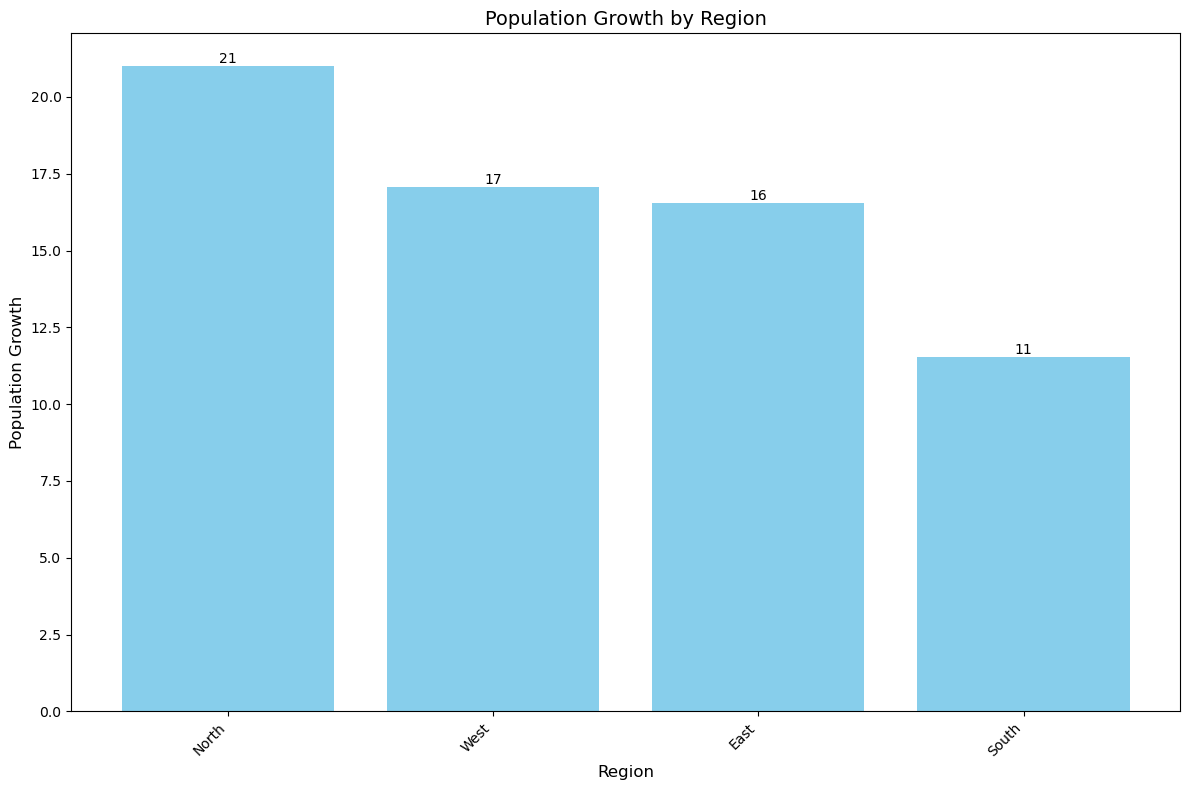

In [78]:
# Sort the DataFrame by Population Growth for better visualization
df_sorted = unique_region_df.sort_values(by='Regional PopGrowth Percent', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Bar plot for Population Growth
bars = ax.bar(df_sorted['Region'], df_sorted['Regional PopGrowth Percent'], color='skyblue')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', va='bottom', ha='center')

# Set title and labels
plt.title('Population Growth by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Population Growth', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate region names if needed

# Show the plot
plt.tight_layout()
plt.show()

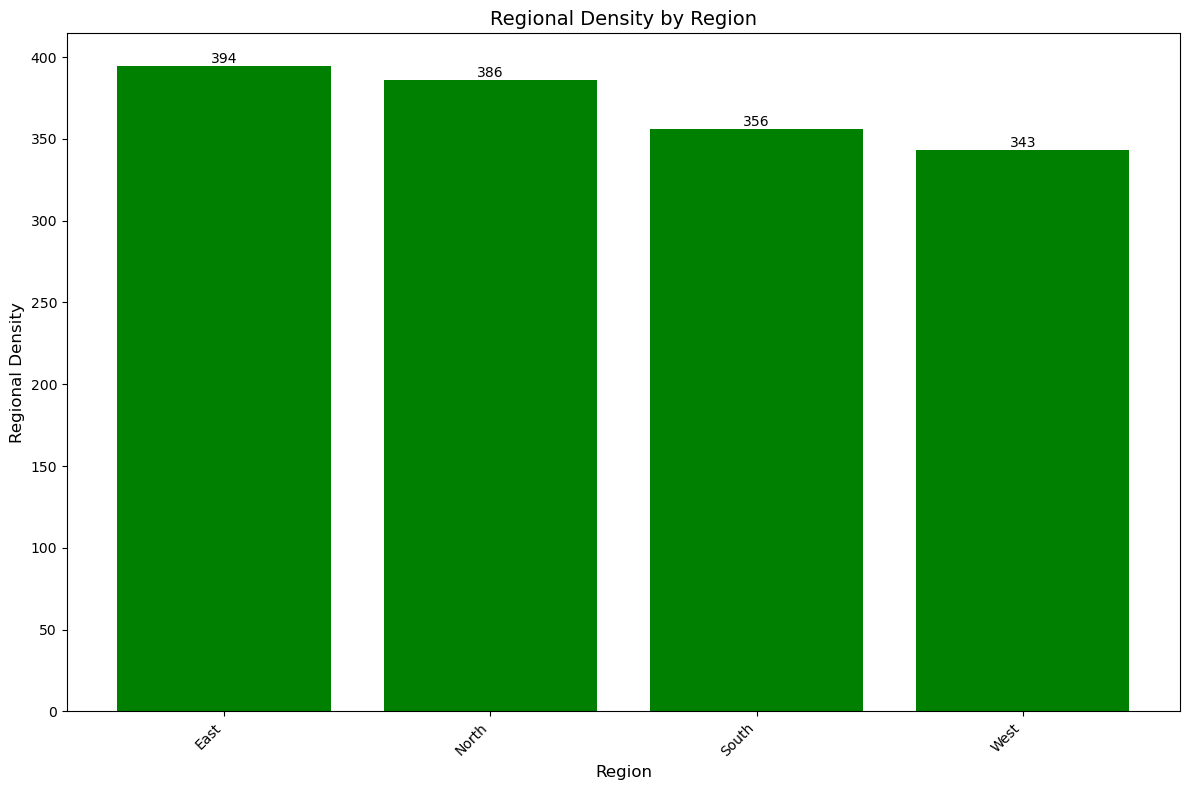

In [79]:
# Sort the DataFrame by Population Growth for better visualization
df_sorted = unique_region_df.sort_values(by='Regional Density', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Bar plot for Population Growth
bars = ax.bar(df_sorted['Region'], df_sorted['Regional Density'], color='Green')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', va='bottom', ha='center')

# Set title and labels
plt.title('Regional Density by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Regional Density', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate region names if needed

# Show the plot
plt.tight_layout()
plt.show()

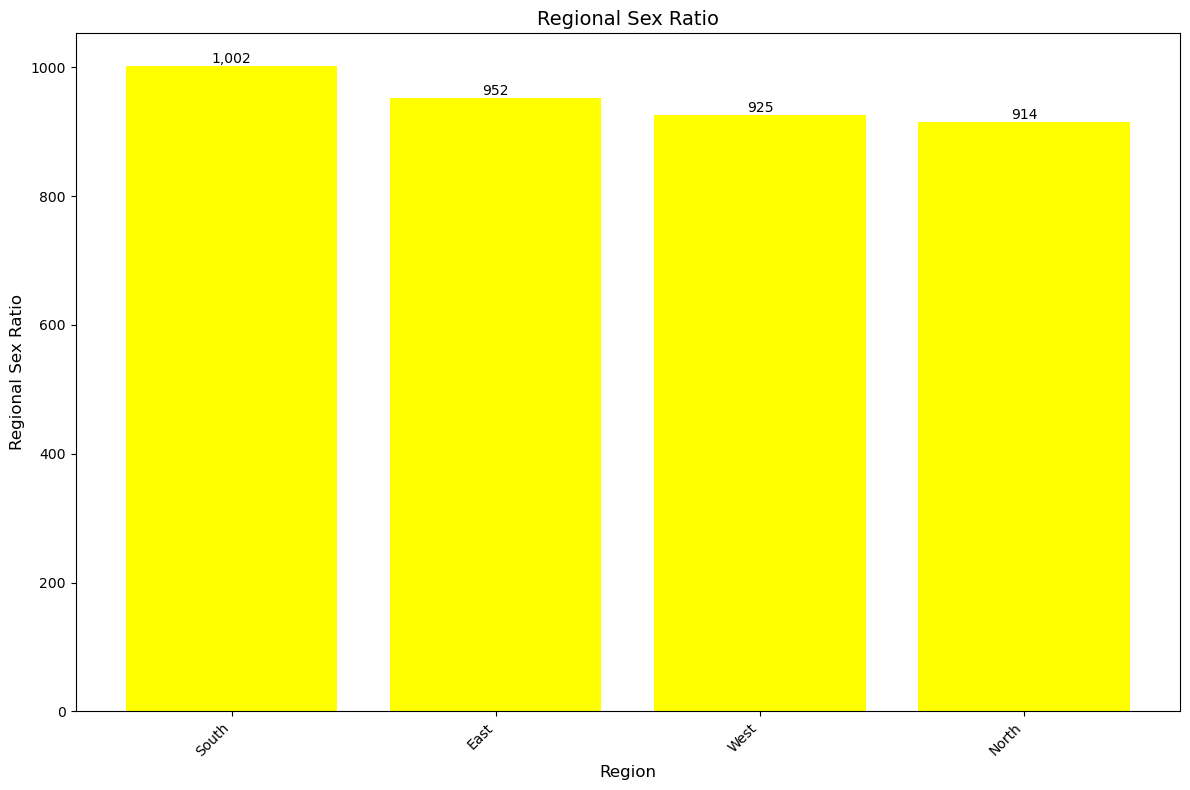

In [80]:
# Sort the DataFrame by Population Growth for better visualization
df_sorted = unique_region_df.sort_values(by='Regional Sex Ratio', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Bar plot for Population Growth
bars = ax.bar(df_sorted['Region'], df_sorted['Regional Sex Ratio'], color='Yellow')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', va='bottom', ha='center')

# Set title and labels
plt.title('Regional Sex Ratio', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Regional Sex Ratio', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate region names if needed

# Show the plot
plt.tight_layout()
plt.show()

The below code comapares Population Growth of two Regions

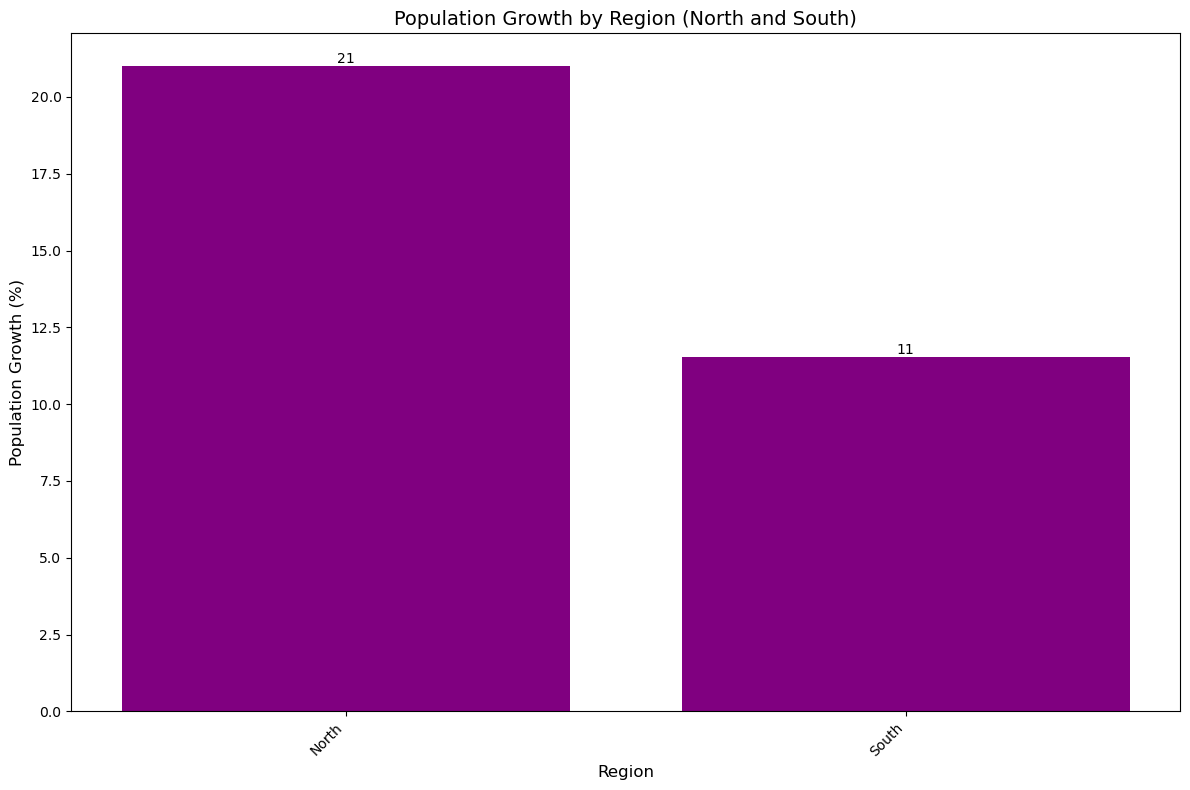

In [81]:
# Filter the DataFrame to include only 'North' and 'South'
df_filtered = unique_region_df[unique_region_df['Region'].isin(['North', 'South'])]

# Sort the DataFrame by Population Growth for better visualization
df_sorted = df_filtered.sort_values(by='Regional PopGrowth Percent', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Bar plot for Population Growth
bars = ax.bar(df_sorted['Region'], df_sorted['Regional PopGrowth Percent'], color='Purple')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', va='bottom', ha='center')

# Set title and labels
plt.title('Population Growth by Region (North and South)', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Population Growth (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate region names if needed

# Show the plot
plt.tight_layout()
plt.show()